# Entrada y salida

## Algunos detalles sobre entrada y salida

Vamos a ver en más detalle las opciones para leer y escribir a archivos nuestros datos:

### Archivos comprimidos

Existen varias formas de reducir el tamaño de los archivos de datos.  Varios factores, tales como el sistema operativo, nuestra familiaridad con cada uno de ellos, le da una cierta preferencia a algunos de los métodos disponibles. Veamos cómo hacer para leer y escribir algunos de los siguientes formatos: **zip, gzip, bz2** 

In [4]:
import gzip

In [5]:
import bz2


In [6]:
fi= gzip.open('../data/palabras.words.gz')
a = fi.read()
fi.close()

In [7]:
l= a.splitlines()
print(l[:10])

[b'\xc3\x81frica', b'\xc3\x81ngela', b'\xc3\xa1baco', b'\xc3\xa1bsida', b'\xc3\xa1bside', b'\xc3\xa1cana', b'\xc3\xa1caro', b'\xc3\xa1cates', b'\xc3\xa1cido', b'\xc3\xa1cigos']


Con todo esto podríamos escribir (si tuviéramos necesidad) una función que puede leer un archivo en cualquiera de estos formatos

In [8]:
import gzip
import bz2
from os.path import splitext
import zipfile

def abrir(fname, mode='r'):
  if fname.endswith('gz'):
    fi= gzip.open(fname, mode=mode)
  elif fname.endswith('bz2'):
    fi= bz2.open(fname, mode=mode)    
  elif fname.endswith('zip'):
    fi= zipfile.ZipFile(fname, mode=mode)
  else:
    fi = open(fname, mode=mode)
  return fi

In [9]:
ff= abrir('../data/palabras.words.gz')
a = ff.read()
ff.close()

In [10]:
l = a.splitlines()

In [11]:
for p in l[:10]:
  print(p.decode())

África
Ángela
ábaco
ábsida
ábside
ácana
ácaro
ácates
ácido
ácigos


In [13]:
!ls ../data/palabras*

../data/palabras.tar.gz  ../data/palabras.words.gz


In [ ]:
f2 = abrir('../data/palabras.words.zip')
b= f2.read('palabras.words')
f2.close()

In [ ]:
b == a

## Entrada/salida con *Numpy*

Veamos un ejemplo (apenas) más complicado, donde antes de la lista de números tenemos un *header*

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
!head ../data/tof_signal_5.dat
X0 = np.loadtxt('../data/tof_signal_5.dat')

# tiempo    cuentas
4.953125e-06 -7.940000e-05
4.963125e-06 -5.930000e-05
4.973125e-06 -8.945000e-05
4.983125e-06 -7.940000e-05
4.993125e-06 -6.935000e-05
5.003125e-06 -6.935000e-05
5.013125e-06 -9.950000e-05
5.023125e-06 -5.930000e-05
5.033125e-06 -5.930000e-05


In [16]:
X0.shape

(1000, 2)

In [17]:
X0[0].shape

(2,)

In [23]:
X0[0]

array([  4.95312500e-06,  -7.94000000e-05])

In [26]:
type((2)), type((2,))

(int, tuple)

In [27]:
t1 = 2,
t2 = 3,5

In [28]:
type(t1), type(t2)

(tuple, tuple)

In [29]:
fdatos= '../data/exper_col.dat'
!head ../data/exper_col.dat

In [30]:
X1 = np.loadtxt(fdatos, skiprows=5)
print(X1.shape)
print(X1[0])

(76, 4)
[  9.901       15.35198465  12.12121212  14.86049333]


In [31]:
x, y = np.loadtxt(fdatos, skiprows=5, usecols=[0, 2], unpack=True)
print (x.size, y.size)

76 76


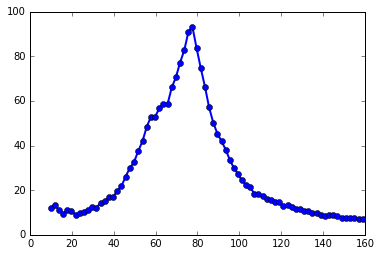

In [32]:
plt.plot(x,y, 'o-')

Como numpy se especializa en manejar números, tiene muchas funciones para crear arrays a partir de información numérica a partir de texto o archivos (como los CSV, por ejemplo). Ya vimos como leer datos con `loadtxt`. También se pueden generar desde un string:

In [33]:
np.fromstring(u"1.0 2.3   3.0 4.1   -3.1", sep=" ", dtype=float)

array([ 1. ,  2.3,  3. ,  4.1, -3.1])

### Datos en formato binario

In [34]:
np.save('test.npy', X1)  # Grabamos el array a archivo 
X2 = np.load('test.npy')     # Y lo leemos

In [35]:
# Veamos si alguno de los elementos difiere
print('X1=', X1[:10])
print('X2=', X2[:10])

X1= [[  9.901       15.35198465  12.12121212  14.86049333]
 [ 11.881       17.25443986  13.38496506  12.137559  ]
 [ 13.793       17.54513159  11.01369466  12.33403468]
 [ 15.813       14.67147284   9.49006706  10.68943707]
 [ 17.802       15.05448826  11.06306509  11.11859838]
 [ 19.784       12.99029519  10.5683657   10.77717061]
 [ 21.806       12.19847748   9.04125935  10.50844347]
 [ 23.802       13.57028821   9.74380512  10.46262448]
 [ 25.68        13.16199377  10.00583998   9.76919784]
 [ 27.699       14.91028557  10.93034162  11.29189365]]
X2= [[  9.901       15.35198465  12.12121212  14.86049333]
 [ 11.881       17.25443986  13.38496506  12.137559  ]
 [ 13.793       17.54513159  11.01369466  12.33403468]
 [ 15.813       14.67147284   9.49006706  10.68943707]
 [ 17.802       15.05448826  11.06306509  11.11859838]
 [ 19.784       12.99029519  10.5683657   10.77717061]
 [ 21.806       12.19847748   9.04125935  10.50844347]
 [ 23.802       13.57028821   9.74380512  10.46262448]
 

In [36]:
print('¿Alguna differencia?', np.any(X1-X2))

¿Alguna differencia? False


## Personalizando el modo de visualización

**Matplotlib** da la posibilidad de modificar el estilo de la graficación en distintas "etapas".

### Archivo de configuración


Cuando uno carga el módulo busca un archivo de configuración llamado `matplotlibrc`

  1. Primero busca un archivo de configuración en el directorio de trabajo también lo lee. En cada caso sobreescribe las variables. 
  2. Si la variable `MATPLOTLIBRC` existe (para el usuario), busca el archivo `$MATPLOTLIBRC/matplotlibrc`
  3. Luego lee un archivo de configuración global del usuario, que dependiendo del sistema operativo puede ser:
    * En Linux, `config/matplotlib/matplotlibrc` (o en `$XDG_CONFIG_HOME/matplotlib/matplotlibrc` si la variable `XDG_CONFIG_HOME` existe)
    * En otras plataformas puede estar en algún lugar como: `C:\Documents and Settings\USUARIO\.matplotlib`
  4. Finalmente lee el archivo global de la instalación, `INSTALL/matplotlib/mpl-data/matplotlibrc`, donde INSTALL se refiere al lugar de instalación

En cualquier caso, podemos obtener el directorio y archivo de configuración con las funciones:

In [38]:
import matplotlib

In [39]:
matplotlib.get_configdir()

'/home/fiol/.config/matplotlib'

In [40]:
matplotlib.matplotlib_fname()

'/home/fiol/.config/matplotlib/matplotlibrc'

### Hojas de estilo

Matplotlib ha incorporado en los últimos años un paquete que permite cambiar estilos fácilmente utilizando los mismos nombres para los parámetros que hay en el archivo de configuración `matplotlibrc`.

Este paquete tiene pre-definidos unos pocos estilos, entre ellos varios que emulan otros paquetes o programas. Veamos un ejemplo:


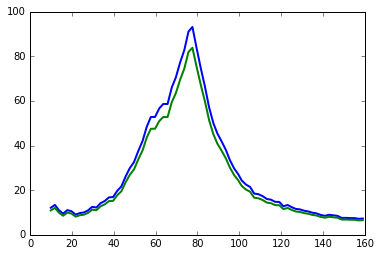

In [43]:
plt.plot(x,y, x, 0.9*y)

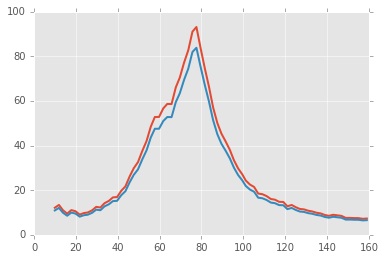

In [44]:
with plt.style.context('ggplot'):
  plt.plot(x,y, x,0.9*y)

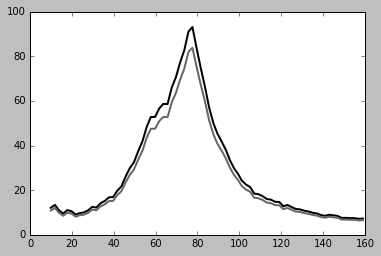

In [45]:
with plt.style.context('grayscale'):
  plt.plot(x,y, x,0.9*y)

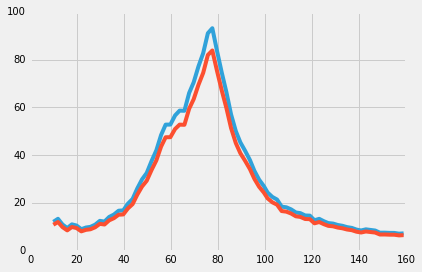

In [46]:
with plt.style.context('fivethirtyeight'):
  plt.plot(x,y, x,0.9*y)

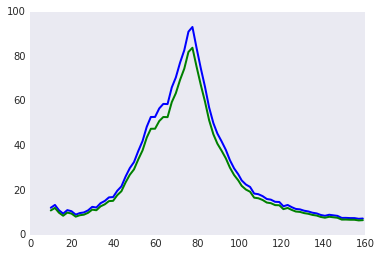

In [47]:
with plt.style.context('seaborn-dark'):
  plt.plot(x,y, x,0.9*y)

Los estilos disponibles están guardados en la variable `available` (una lista)

In [48]:
plt.style.available

['classic',
 'dark_background',
 'seaborn-darkgrid',
 'seaborn-colorblind',
 'seaborn-pastel',
 'seaborn-deep',
 'seaborn-dark-palette',
 'paper',
 'seaborn-white',
 'seaborn-ticks',
 'seaborn-bright',
 'seaborn-muted',
 'seaborn-dark',
 'bmh',
 'seaborn-talk',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'seaborn-paper',
 'seaborn-notebook',
 'seaborn-poster',
 'grayscale',
 'presentation',
 'darker',
 'ggplot']

#### Combinando estilos

Los estilos pueden combinarse. En este caso, debe pasarse una lista

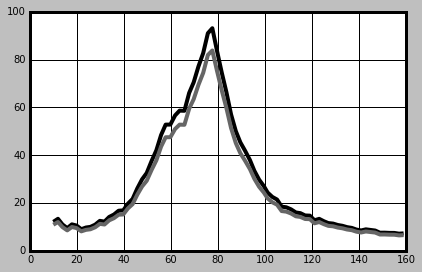

In [49]:
with plt.style.context(['fivethirtyeight','grayscale']):
  plt.plot(x,y, x,0.9*y)

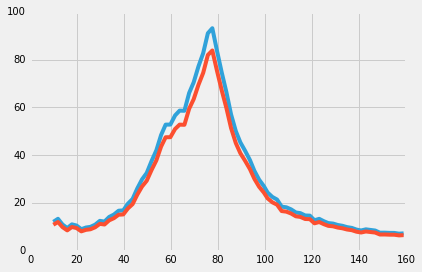

In [50]:
with plt.style.context(['grayscale','fivethirtyeight']):
  plt.plot(x,y, x,0.9*y)

#### Creación de estilos propios

Podemos crear estilos propios, modificando los defaults con una sintaxis similar a la del archivo de configuración. Por ejemplo creemos un archivo 'estilo_test' con algunos parámetros

In [51]:
!echo "lines.linewidth : 5" > estilo_test
!echo "xtick.labelsize: 24" >> estilo_test

In [52]:
!cat estilo_test

lines.linewidth : 5
xtick.labelsize: 24


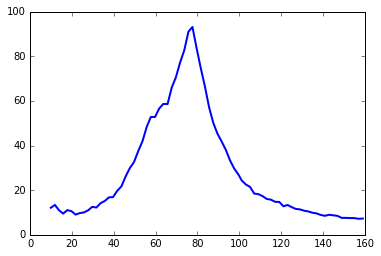

In [53]:
plt.plot(x,y)

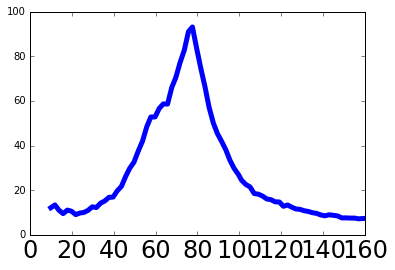

In [54]:
with plt.style.context('./estilo_test'):
  plt.plot(x,y)

In [55]:
matplotlib.get_configdir()

'/home/fiol/.config/matplotlib'

In [58]:
ls /home/fiol/.config/matplotlib/stylelib/

darker.mplstyle  paper.mplstyle  presentation.mplstyle


In [59]:
!cat /home/fiol/.config/matplotlib/stylelib/presentation.mplstyle

# -*- "mode": "Conf[Colon]" -*-
font.size : 16
axes.titlesize : x-large
axes.labelsize : x-large
lines.linewidth : 4.0
lines.markersize : 10
xtick.labelsize : large
ytick.labelsize : large
legend.shadow   : True
legend.fancybox : True
figure.subplot.bottom  : 0.125    # the bottom of the subplots of the figure
figure.subplot.top     : 0.95    # the top of the subplots of the figure
savefig.bbox         : tight    # 'tight' or 'standard'.
mathtext.default : regular


### Modificación de parámetros dentro de programas



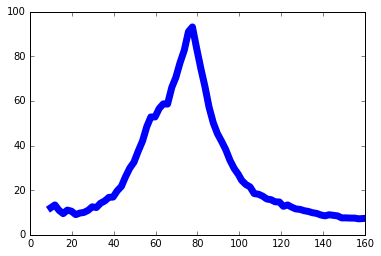

In [63]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 7
plt.plot(x,y)

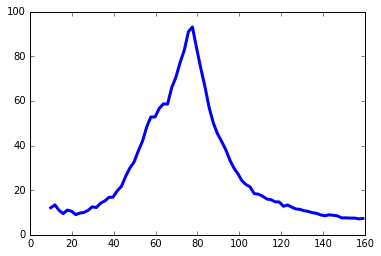

In [66]:
plt.plot(x,y, linewidth=3)

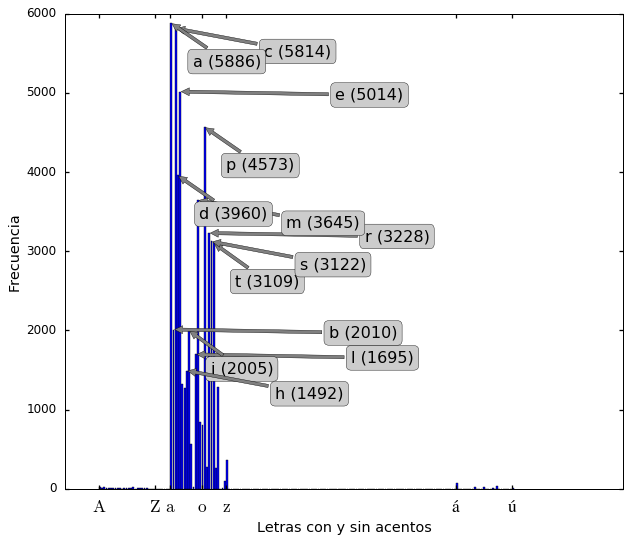

In [69]:
# %load scripts/10_palabras.py
#! /usr/bin/ipython
import numpy as np
import matplotlib.pyplot as plt
import gzip
ifiname = '../data/palabras.words.gz'

letras = [0] * 512
with gzip.open(ifiname, mode='r') as fi:
  for l in fi.readlines():
    c = ord(l.decode('utf-8')[0])
    letras[c] += 1

nmax = np.nonzero(letras)[0].max() + 1
z = np.array(letras[:nmax])
# nmin = z.nonzero()[0].min()     # Máximo valor diferente de cero
nmin = np.argwhere(z != 0).min()
#plt.ion()
with plt.style.context(['seaborn-talk', 'presentation']):
  fig = plt.figure(figsize=(10, 8))
  #plt.clf()
  plt.bar(np.arange(nmin, nmax), z[nmin:nmax])
  plt.xlabel('Letras con y sin acentos')
  plt.ylabel('Frecuencia')

  labels = ['A', 'Z', 'a', 'o', 'z', 'á', 'ú']
  ll = [r'$\mathrm{{{}}}$'.format(t) for t in labels]
  ts = [ord(t) for t in labels]
  plt.xticks(ts, ll, fontsize='xx-large')

  x0 = 0.5 * ord('á') + ord('z')
  y0 = 0.2 * z.max()
  umbral = 0.25
  lista = (z > umbral * z.max()).nonzero()[0]

  dx = [10, 40, 70]
  dy = [-550, -350, -100]

  for j, t in enumerate(reversed(lista)):
    plt.annotate('{} ({})'.format(chr(t), z[t]), xy=(t, z[t]), xycoords='data',
                 xytext=(t + dx[j % 3], z[t] + dy[j % 3]), bbox=dict(boxstyle="round", fc="0.8"),
                 arrowprops=dict(arrowstyle="simple", fc="0.5")
                 )
